In [1]:
pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install filterpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110459 sha256=1c83876ebb5c43659442fb09b02c43406b779ee745087ecf358f7c779f192c67
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [5]:
import IPython.display as ipd
import music21
from pydub import AudioSegment
import tensorflow as tf
import tensorflow_hub as hub

import numpy as np
import matplotlib.pyplot as plt
import librosa
from librosa import display as librosadisplay

import logging
import math
import statistics
import sys

from IPython.display import Audio, Javascript
from scipy.io import wavfile
import soundfile as sf

from base64 import b64decode

import music21
from pydub import AudioSegment

In [ ]:
INPUT_SOURCE = '/content/drive/MyDrive/TY-SEM-II/EDI/Audio-Samples/d3.wav'
print('You selected', INPUT_SOURCE)

if INPUT_SOURCE == 'RECORD':
  uploaded_file_name = record(5)
elif INPUT_SOURCE == 'UPLOAD':
  try:
    from google.colab import files
  except ImportError:
    print("ImportError: files from google.colab seems to not be available")
  else:
    uploaded = files.upload()
    for fn in uploaded.keys():
      print('User uploaded file "{name}" with length {length} bytes'.format(
          name=fn, length=len(uploaded[fn])))
    uploaded_file_name = next(iter(uploaded))
    print('Uploaded file: ' + uploaded_file_name)
elif INPUT_SOURCE.startswith('/content/drive/'):
  try:
    from google.colab import drive
  except ImportError:
    print("ImportError: files from google.colab seems to not be available")
  else:
    drive.mount('/content/drive')
    # don't forget to change the name of the file you
    # will you here!
    gdrive_audio_file = 'YOUR_MUSIC_FILE.wav'
    uploaded_file_name = INPUT_SOURCE
elif INPUT_SOURCE.startswith('http'):
  !wget --no-check-certificate 'https://storage.googleapis.com/download.tensorflow.org/data/c-scale-metronome.wav' -O c-scale.wav
  uploaded_file_name = 'c-scale.wav'
else:
  print('Unrecognized input format!')
  print('Please select "RECORD", "UPLOAD", or specify a file hosted on Google Drive or a file from the web to download file to download')

You selected /content/drive/MyDrive/TY-SEM-II/EDI/Audio-Samples/d3.wav
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the audio file
audio_file, sr = librosa.load('/content/drive/MyDrive/TY-SEM-II/EDI/Final_Notebooks/Test/shapeofyoumid.wav')

# Set the threshold for silence detection
threshold_energy = np.mean(np.abs(audio_file)) * 1.5  # Adjust the multiplier as needed

# Find the indices where the audio exceeds the threshold energy
non_silent_indices = np.where(np.abs(audio_file) > threshold_energy)[0]

# Detect the start and end indices of the music
start_index = non_silent_indices[0]
end_index = non_silent_indices[-1]

# Extract the music segment
music_segment = audio_file[start_index:end_index]

#save this new audio 
output_path = '/content/drive/MyDrive/TY-SEM-II/EDI/Final_Notebooks/Test/shapeofyoumid-trim.wav'
sf.write(output_path, music_segment, sr)

# Play the music segment
from IPython.display import Audio
# Load the audio file
audio_file, sr = librosa.load('/content/drive/MyDrive/TY-SEM-II/EDI/Final_Notebooks/Test/shapeofyoumid-trim.wav')
# Play the audio
Audio(audio_file, rate=sr)
print(sr)

22050


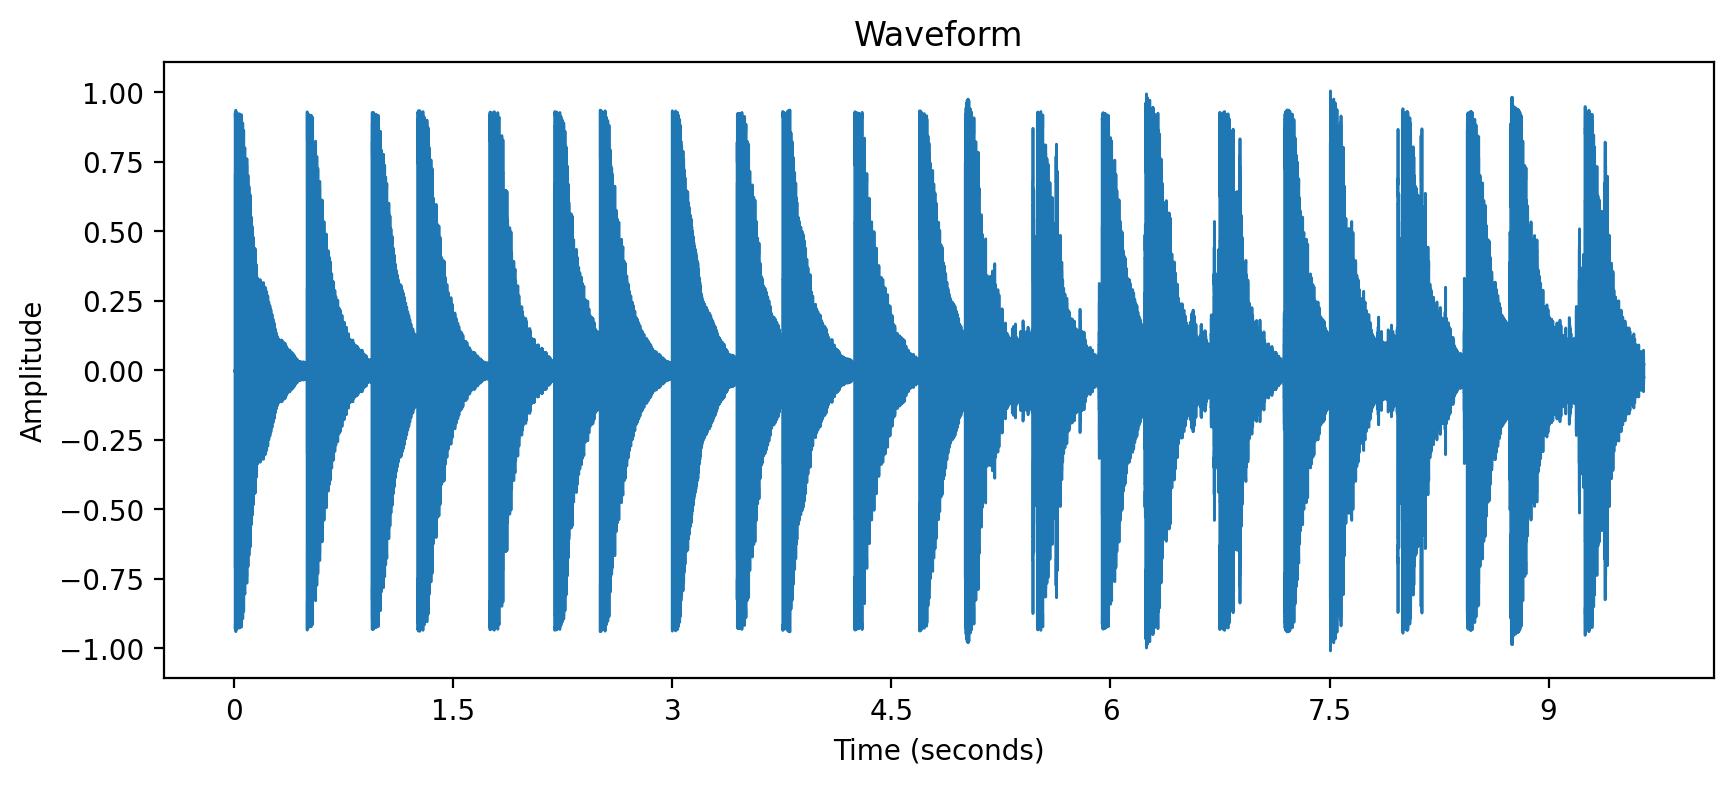

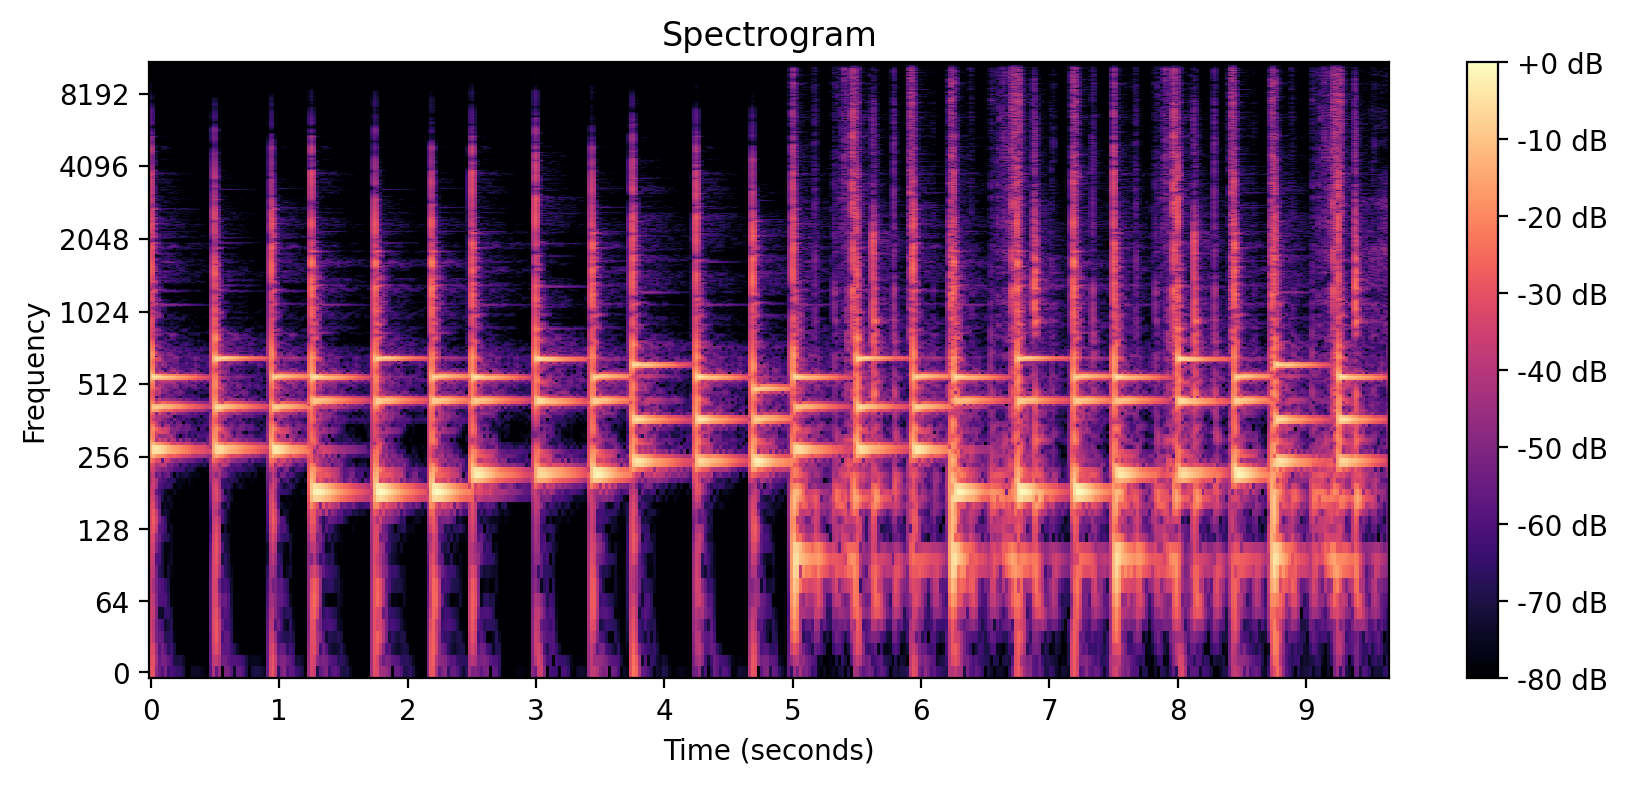

In [6]:
# Calculate the duration of the audio file
audio_file, sr = librosa.load('/content/drive/MyDrive/TY-SEM-II/EDI/Final_Notebooks/Test/shapeofyoustart.wav')
duration = len(audio_file) / sr

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio_file, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

# Plot the spectrogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio_file)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

In [25]:
EXPECTED_SAMPLE_RATE = 22050

def convert_audio(user_file, output_file='converted_audio_file.wav'):
  audio = AudioSegment.from_file(user_file)
  audio = audio.set_frame_rate(EXPECTED_SAMPLE_RATE).set_channels(1)
  audio.export(output_file, format="wav")
  return output_file

In [35]:
audio_file_loc = '/content/drive/MyDrive/TY-SEM-II/EDI/Final_Notebooks/Test/shapeofyoustart.wav'
converted_audio_file = convert_audio(audio_file_loc)

In [36]:
# Loading audio samples from the wav file:
sample_rate, audio_samples = wavfile.read(converted_audio_file, 'rb')

# Show some basic information about the audio.
duration = len(audio_samples)/sample_rate
print(f'Sample rate: {sample_rate} Hz')
print(f'Total duration: {duration:.2f}s')
print(f'Size of the input: {len(audio_samples)}')

# Let's listen to the wav file.
Audio(audio_samples, rate=sample_rate)

Sample rate: 22050 Hz
Total duration: 9.65s
Size of the input: 212783


In [37]:
# Base Code - 1
import librosa
import numpy as np

def process_frame(frame):
    pitch = librosa.yin(frame, fmin=80, fmax=900)
    # return np.mean(pitch[1:])  # Calculate the average pitch value
    return pitch
    # print(pitch)

def process_audio(audio, frame_size, hop_length):
    frames = librosa.util.frame(audio, frame_length=frame_size, hop_length=hop_length)
    num_frames = frames.shape[1]
    pitches = []

    for i in range(num_frames):
        frame = frames[:, i]
        pitch = process_frame(frame)
        for j in pitch:
          pitches.append(j)

    return pitches

audio, sr = librosa.load(converted_audio_file)

frame_size = 2048  # Increase frame length
hop_length = 1024 # Increase hop length

pitches = process_audio(audio, frame_size, hop_length)

# Print the estimated pitch for each frame
pitchvals = []
for i, pitch in enumerate(pitches):
    pitchvals.append(pitch)
    print(f"Frame {i+1}: {pitch} Hz")
#
# print(pitches) 

Frame 1: 695.360018641498 Hz
Frame 2: 137.89518066140351 Hz
Frame 3: 137.61843999847966 Hz
Frame 4: 137.2892446801781 Hz
Frame 5: 137.33169117018372 Hz
Frame 6: 361.66531587680066 Hz
Frame 7: 137.30474100578644 Hz
Frame 8: 137.24584829667577 Hz
Frame 9: 137.27428719835527 Hz
Frame 10: 137.29865037223504 Hz
Frame 11: 291.4680204857706 Hz
Frame 12: 137.35800710433244 Hz
Frame 13: 137.25515153714107 Hz
Frame 14: 137.21141310569408 Hz
Frame 15: 137.18536942725638 Hz
Frame 16: 119.91972186643221 Hz
Frame 17: 137.2865402591844 Hz
Frame 18: 137.1766509540711 Hz
Frame 19: 137.16581972339094 Hz
Frame 20: 137.26877710931092 Hz
Frame 21: 695.3330959442886 Hz
Frame 22: 137.3866023109751 Hz
Frame 23: 137.15480009845146 Hz
Frame 24: 137.09983711738843 Hz
Frame 25: 137.16665782202833 Hz
Frame 26: 147.4408704554353 Hz
Frame 27: 137.3949201211774 Hz
Frame 28: 137.15462559570858 Hz
Frame 29: 137.12042977961616 Hz
Frame 30: 137.12574243114273 Hz
Frame 31: 249.97665181308503 Hz
Frame 32: 137.1773349831086

In [38]:
def map_pitch_to_notes(pitch_values, window_size=2048, hop_length=1024, pitch_threshold=0.5, pitch_difference_threshold=0.1):
    num_windows = len(pitch_values)
    notes = []
    current_note = None
    
    # Iterate over each window
    for i in range(num_windows):
        pitch = pitch_values[i]
        
        # Check if pitch value exceeds the threshold
        if pitch > pitch_threshold:
            # If there is no current note, create a new note
            if current_note is None:
                current_note = {'start': i * hop_length, 'end': (i * hop_length) + window_size, 'pitches': [pitch]}
            else:
                # If the current pitch is within the difference threshold of the previous note's pitch, extend the note
                if abs(pitch - current_note['pitches'][-1]) <= pitch_difference_threshold:
                    current_note['end'] = (i * hop_length) + window_size
                    current_note['pitches'].append(pitch)
                else:
                    # Add the completed note to the notes list
                    notes.append(current_note)
                    # Create a new note
                    current_note = {'start': i * hop_length, 'end': (i * hop_length) + window_size, 'pitches': [pitch]}
        else:
            # If there is a current note, add it to the notes list and reset the current note
            if current_note is not None:
                notes.append(current_note)
                current_note = None
    
    # Add the last note if it was not completed
    if current_note is not None:
        notes.append(current_note)
    
    return notes


In [39]:
# Example usage
# Replace pitch_values with the actual pitch values for your song

pitch_values = pitchvals # Example random pitch values
notes = map_pitch_to_notes(pitch_values)

# Print the detected notes
for note in notes:
    print(f"Start Time: {note['start']} ms, End Time: {note['end']} ms, Pitches: {note['pitches']}")

Start Time: 0 ms, End Time: 2048 ms, Pitches: [695.360018641498]
Start Time: 1024 ms, End Time: 3072 ms, Pitches: [137.89518066140351]
Start Time: 2048 ms, End Time: 4096 ms, Pitches: [137.61843999847966]
Start Time: 3072 ms, End Time: 6144 ms, Pitches: [137.2892446801781, 137.33169117018372]
Start Time: 5120 ms, End Time: 7168 ms, Pitches: [361.66531587680066]
Start Time: 6144 ms, End Time: 11264 ms, Pitches: [137.30474100578644, 137.24584829667577, 137.27428719835527, 137.29865037223504]
Start Time: 10240 ms, End Time: 12288 ms, Pitches: [291.4680204857706]
Start Time: 11264 ms, End Time: 13312 ms, Pitches: [137.35800710433244]
Start Time: 12288 ms, End Time: 16384 ms, Pitches: [137.25515153714107, 137.21141310569408, 137.18536942725638]
Start Time: 15360 ms, End Time: 17408 ms, Pitches: [119.91972186643221]
Start Time: 16384 ms, End Time: 18432 ms, Pitches: [137.2865402591844]
Start Time: 17408 ms, End Time: 20480 ms, Pitches: [137.1766509540711, 137.16581972339094]
Start Time: 1945

Frame 1: 137.61843999847966 Hz
Frame 2: 137.61843999847966 Hz
Frame 3: 137.61843999847966 Hz
Frame 4: 137.61843999847966 Hz
Frame 5: 137.33169117018372 Hz
Frame 6: 137.30474100578644 Hz
Frame 7: 137.30474100578644 Hz
Frame 8: 137.29865037223504 Hz
Frame 9: 137.29865037223504 Hz
Frame 10: 137.29865037223504 Hz
Frame 11: 137.29865037223504 Hz
Frame 12: 137.29865037223504 Hz
Frame 13: 137.25515153714107 Hz
Frame 14: 137.21141310569408 Hz
Frame 15: 137.21141310569408 Hz
Frame 16: 137.18536942725638 Hz
Frame 17: 137.1766509540711 Hz
Frame 18: 137.1766509540711 Hz
Frame 19: 137.26877710931092 Hz
Frame 20: 137.26877710931092 Hz
Frame 21: 137.26877710931092 Hz
Frame 22: 137.26877710931092 Hz
Frame 23: 137.16665782202833 Hz
Frame 24: 137.16665782202833 Hz
Frame 25: 137.16665782202833 Hz
Frame 26: 137.16665782202833 Hz
Frame 27: 137.16665782202833 Hz
Frame 28: 137.15462559570858 Hz
Frame 29: 137.15462559570858 Hz
Frame 30: 137.15462559570858 Hz
Frame 31: 137.12574243114273 Hz
Frame 32: 137.12574

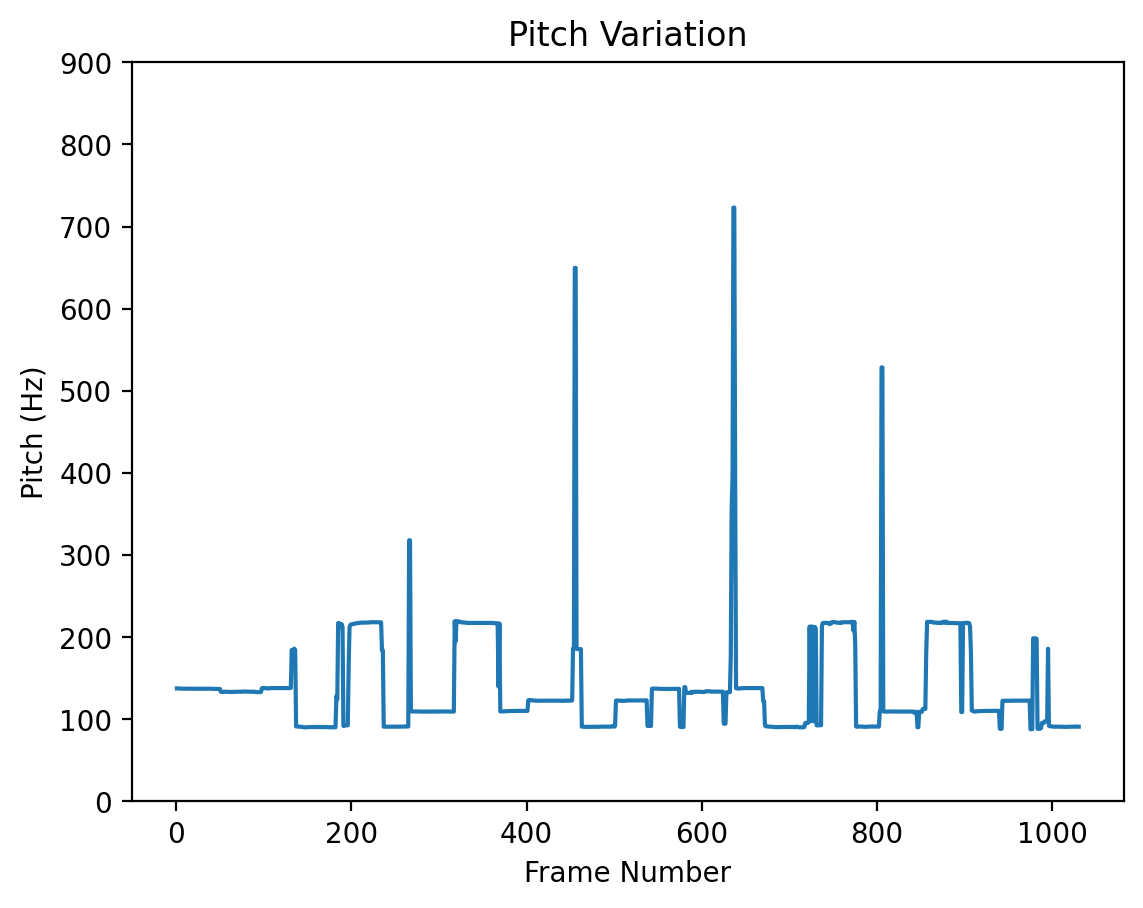

In [45]:
# Median Filtering Applied to this Code.
import librosa
import numpy as np
from scipy.signal import medfilt

def process_frame(frame):
    pitch = librosa.yin(frame, fmin=80, fmax=1000)
    return pitch

def process_audio(audio, frame_size, hop_length, median_filter_size):
    frames = librosa.util.frame(audio, frame_length=frame_size, hop_length=hop_length)
    num_frames = frames.shape[1]
    pitches = []

    for i in range(num_frames):
        frame = frames[:, i]
        pitch = process_frame(frame)
        for j in pitch:
            pitches.append(j)

    pitches = np.array(pitches)
    filtered_pitches = medfilt(pitches, median_filter_size)

    return filtered_pitches

audio, sr = librosa.load(converted_audio_file)

frame_size = 2048  # Increase frame length
hop_length = 1024  # Increase hop length
median_filter_size = 5  # Adjust the size as needed

filtered_pitches = process_audio(audio, frame_size, hop_length, median_filter_size)

# Print the estimated pitch for each frame
for i, pitch in enumerate(filtered_pitches):
    print(f"Frame {i+1}: {pitch} Hz")

# Create x-axis values for the frame number
frame_numbers = np.arange(len(filtered_pitches)) + 1

# Plot the pitch values
plt.plot(frame_numbers, filtered_pitches)
plt.xlabel('Frame Number')
plt.ylabel('Pitch (Hz)')
plt.title('Pitch Variation')
plt.ylim(0, 900)  
plt.show()

In [41]:
# Define mapping between pitch values and note names
notes ={
    16.35: 'C0', 17.32: 'C#0/Db0', 18.35: 'D0', 19.45: 'D#0/Eb0', 20.60: 'E0', 21.83: 'F0', 23.12: 'F#0/Gb0',
    24.50: 'G0', 25.96: 'G#0/Ab0', 27.50: 'A0', 29.14: 'A#0/Bb0', 30.87: 'B0', 32.70: 'C1', 34.65: 'C#1/Db1',
    36.71: 'D1', 38.89: 'D#1/Eb1', 41.20: 'E1', 43.65: 'F1', 46.25: 'F#1/Gb1', 49.00: 'G1', 51.91: 'G#1/Ab1',
    55.00: 'A1', 58.27: 'A#1/Bb1', 61.74: 'B1', 65.41: 'C2', 69.30: 'C#2/Db2', 73.42: 'D2', 77.78: 'D#2/Eb2',
    82.41: 'E2', 87.31: 'F2', 92.50: 'F#2/Gb2', 98.00: 'G2', 103.83: 'G#2/Ab2', 110.00: 'A2', 116.54: 'A#2/Bb2',
    123.47: 'B2', 130.81: 'C3', 138.59: 'C#3/Db3', 146.83: 'D3', 155.56: 'D#3/Eb3', 164.81: 'E3', 174.61: 'F3',
    185.00: 'F#3/Gb3', 196.00: 'G3', 207.65: 'G#3/Ab3', 220.00: 'A3', 233.08: 'A#3/Bb3', 246.94: 'B3', 261.63: 'C4',
    277.18: 'C#4/Db4', 293.66: 'D4', 311.13: 'D#4/Eb4', 329.63: 'E4', 349.23: 'F4', 369.99: 'F#4/Gb4', 392.00: 'G4',
    415.30: 'G#4/Ab4', 440.00: 'A4', 466.16: 'A#4/Bb4', 493.88: 'B4', 523.25: 'C5', 554.37: 'C#5/Db5', 587.33: 'D5',
    622.25: 'D#5/Eb5', 659.25: 'E5', 698.46: 'F5', 739.99: 'F#5/Gb5', 783.99: 'G5', 830.61: 'G#5/'}

# Convert pitch values to notes
notes_detected = []

for p in filtered_pitches:
    # Find closest pitch value in the mapping
    closest_pitch = min(notes.keys(), key=lambda x:abs(x-p))
    # print(p)

    # Get note name from mapping
    note = notes[closest_pitch]
    
    # Append note name to list
    notes_detected.append(note)
    
# Print detected notes
print(notes_detected)

['C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C#3/Db3', 'C

In [46]:
def remove_non_repeating_and_different_notes(notes):
    i = 0
    while i < len(notes) - 1:
        current_note = notes[i]
        next_note = notes[i + 1]

        if current_note != next_note:
            del notes[i]
        else:
            j = i + 1
            while j < len(notes) and notes[j] == current_note:
                j += 1

            i = j

    return notes


def remove_duplicates(notes):
    unique_notes = []
    for note in notes:
        if note not in unique_notes:
            unique_notes.append(note)
    return unique_notes


song_notes = notes_detected
filtered_notes = remove_non_repeating_and_different_notes(song_notes)
filtered_notes2 = remove_duplicates(filtered_notes)
print(filtered_notes2)

['C#3/Db3', 'C3', 'F#3/Gb3', 'F#2/Gb2', 'A3', 'D#4/Eb4', 'A2', 'B2', 'E5', 'F#5/Gb5', 'G2', 'G#3/Ab3', 'C5', 'F2', 'G3']


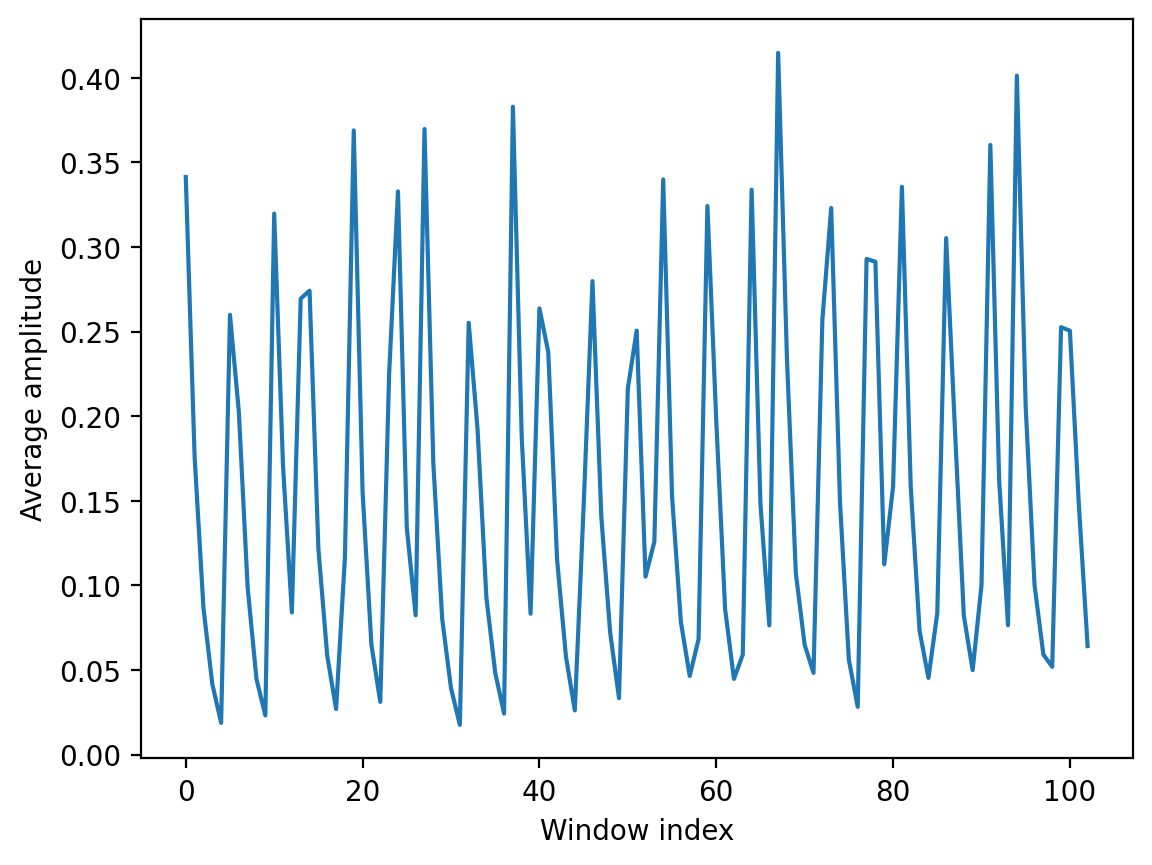

In [43]:
# Average Amplitude Square - Visualisation.

import librosa
import numpy as np
import matplotlib.pyplot as plt


win_size = 2048


audio_file, sr = librosa.load('/content/drive/MyDrive/TY-SEM-II/EDI/Final_Notebooks/Test/shapeofyoustart.wav')


num_Windows = len(audio_file) // win_size


avg_amplitudes = []

#  average amplitude for each window
for i in range(num_Windows):
    start = i * win_size
    end = start + win_size
    window = audio_file[start:end]
    avg_amplitude = np.mean(np.abs(window))
    avg_amplitudes.append(avg_amplitude)


plt.plot(avg_amplitudes)
plt.xlabel('Window index')
plt.ylabel('Average amplitude')
plt.show()

In [48]:
def levenshtein_distance(s1, s2):
    m = len(s1)
    n = len(s2)

    # Initialize matrix
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    # Initialize first row and column
    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j

    # Fill in the rest of the matrix
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            cost = 0 if s1[i - 1] == s2[j - 1] else 1
            dp[i][j] = min(
                dp[i - 1][j] + 1,  # Deletion
                dp[i][j - 1] + 1,  # Insertion
                dp[i - 1][j - 1] + cost,  # Substitution
            )

    return dp[m][n]

In [49]:
def find_best_match(song_database, small_sequence):
    best_match = None
    min_distance = float('inf')

    for song_sequence in song_database:
        distance = min(levenshtein_distance(song_sequence[i:i+len(small_sequence)], small_sequence) for i in range(len(song_sequence) - len(small_sequence) + 1))
        if distance < min_distance:
            min_distance = distance
            best_match = song_sequence

    return best_match

In [50]:
song_database = [
    ['F#3/Gb3', 'D4', 'C3', 'A#2/Bb2', 'E3', 'F#5/Gb5', 'B3', 'F3', 'F#4/Gb4', 'B2', 'G#3/Ab3', 'A3', 'G#5/', 'F#2/Gb2', 'B4', 'C5', 'G#4/Ab4', 'D#5/Eb5', 'G4', 'F4', 'G3', 'G5', 'D#3/Eb3', 'C4', 'D3', 'C#4/Db4', 'C#3/Db3', 'A#3/Bb3', 'F2', 'E4', 'F5', 'E5', 'D5', 'A#4/Bb4', 'A4', 'G2', 'G#2/Ab2', 'A2', 'E2', 'C#5/Db5', 'D#4/Eb4'],
    ['G#5/', 'G5', 'G4', 'A#4/Bb4', 'B4', 'A#2/Bb2', 'C#4/Db4', 'C5', 'E4', 'D3', 'C4', 'F4', 'F5', 'E2', 'F2', 'F3', 'A#3/Bb3', 'F#5/Gb5', 'D4', 'A3', 'D#4/Eb4', 'C#5/Db5', 'E3', 'B3', 'D#2/Eb2', 'G#2/Ab2', 'F#4/Gb4', 'G#4/Ab4', 'C#3/Db3', 'A4', 'G3', 'E5', 'D#3/Eb3', 'G2', 'B2', 'F#2/Gb2', 'C3', 'A2', 'F#3/Gb3', 'D#5/Eb5', 'G#3/Ab3', 'D5'],
    ['G#5/', 'C#5/Db5', 'G4', 'B3', 'E2', 'F#5/Gb5', 'F#3/Gb3', 'D3', 'G3', 'D5', 'G2', 'G5', 'A4', 'D4', 'D#5/Eb5', 'E5', 'B2', 'A#3/Bb3', 'F2', 'B4', 'C3', 'C#3/Db3', 'C4', 'C#4/Db4', 'A#2/Bb2', 'A2', 'D#4/Eb4', 'G#3/Ab3', 'E4', 'F4', 'F#4/Gb4', 'G#4/Ab4', 'F#2/Gb2', 'A3', 'F3', 'E3', 'A#4/Bb4', 'G#2/Ab2', 'D#2/Eb2', 'D#3/Eb3'],
    ['G#5/', 'C#4/Db4', 'C#3/Db3', 'B2', 'F2', 'F3', 'G#3/Ab3', 'F#3/Gb3', 'G#2/Ab2', 'A3', 'A#3/Bb3', 'B3', 'C4', 'G3', 'G2', 'F#2/Gb2', 'E3', 'D#4/Eb4', 'E4', 'D3', 'D4', 'A#2/Bb2', 'E2', 'D#2/Eb2', 'A2', 'D#3/Eb3', 'F5', 'F4', 'C3', 'C#5/Db5', 'G5', 'F#4/Gb4', 'G#4/Ab4', 'G4'],
    ['G#5/', 'F2', 'D#2/Eb2', 'G3', 'E2', 'G2', 'G#2/Ab2', 'A#4/Bb4', 'G#4/Ab4', 'F#3/Gb3', 'A#2/Bb2', 'A2', 'B2', 'E3', 'F4', 'F5', 'B3', 'A#3/Bb3', 'C5', 'F#2/Gb2', 'C3', 'D3', 'C#3/Db3', 'F3', 'A3', 'C#5/Db5', 'C#4/Db4', 'G#3/Ab3', 'D5', 'A4', 'G4', 'B4', 'D4', 'F#4/Gb4', 'E4', 'D#3/Eb3', 'D#4/Eb4', 'C4', 'E5', 'D#5/Eb5', 'G5', 'F#5/Gb5'],
    ['C#3/Db3', 'C3', 'F#3/Gb3', 'F#2/Gb2', 'A3', 'D#4/Eb4', 'A2', 'B2', 'E5', 'F#5/Gb5', 'G2', 'G#3/Ab3', 'C5', 'F2', 'G3', 'C4', 'D4', 'D3', 'E2', 'E3', 'F3', 'G#2/Ab2', 'A#2/Bb2', 'B3', 'D#5/Eb5', 'D#3/Eb3', 'D5', 'C#4/Db4', 'A#3/Bb3', 'E4', 'C#5/Db5', 'F#4/Gb4', 'F4', 'G4', 'B4'],
    ['G#5/', 'F#3/Gb3', 'D#4/Eb4', 'D#5/Eb5', 'G#3/Ab3', 'D#3/Eb3', 'G#2/Ab2', 'A3', 'A4', 'G#4/Ab4', 'D4', 'C4', 'C5', 'A#3/Bb3', 'B3', 'A2', 'A#2/Bb2', 'C3', 'G3', 'D3', 'C#3/Db3', 'C#4/Db4', 'B2', 'F2', 'C#5/Db5', 'A#4/Bb4', 'E3', 'F#4/Gb4', 'D5', 'F#2/Gb2', 'D#2/Eb2', 'G2', 'E2', 'G4', 'E4', 'F4', 'B4', 'E5', 'F3']
]

small_sequence = ['C#3/Db3', 'C3', 'F#3/Gb3', 'F#2/Gb2', 'A3', 'D#4/Eb4', 'A2', 'B2', 'E5', 'F#5/Gb5', 'G2', 'G#3/Ab3', 'C5', 'F2', 'G3']




best_match = find_best_match(song_database, small_sequence)

song_mapping = {
      tuple(['F#3/Gb3', 'D4', 'C3', 'A#2/Bb2', 'E3', 'F#5/Gb5', 'B3', 'F3', 'F#4/Gb4', 'B2', 'G#3/Ab3', 'A3', 'G#5/', 'F#2/Gb2', 'B4', 'C5', 'G#4/Ab4', 'D#5/Eb5', 'G4', 'F4', 'G3', 'G5', 'D#3/Eb3', 'C4', 'D3', 'C#4/Db4', 'C#3/Db3', 'A#3/Bb3', 'F2', 'E4', 'F5', 'E5', 'D5', 'A#4/Bb4', 'A4', 'G2', 'G#2/Ab2', 'A2', 'E2', 'C#5/Db5', 'D#4/Eb4']) : 'Ajib Dastan Hai Ye',
      tuple(['G#5/', 'G5', 'G4', 'A#4/Bb4', 'B4', 'A#2/Bb2', 'C#4/Db4', 'C5', 'E4', 'D3', 'C4', 'F4', 'F5', 'E2', 'F2', 'F3', 'A#3/Bb3', 'F#5/Gb5', 'D4', 'A3', 'D#4/Eb4', 'C#5/Db5', 'E3', 'B3', 'D#2/Eb2', 'G#2/Ab2', 'F#4/Gb4', 'G#4/Ab4', 'C#3/Db3', 'A4', 'G3', 'E5', 'D#3/Eb3', 'G2', 'B2', 'F#2/Gb2', 'C3', 'A2', 'F#3/Gb3', 'D#5/Eb5', 'G#3/Ab3', 'D5']) : 'Blank Space',
      tuple(['G#5/', 'C#5/Db5', 'G4', 'B3', 'E2', 'F#5/Gb5', 'F#3/Gb3', 'D3', 'G3', 'D5', 'G2', 'G5', 'A4', 'D4', 'D#5/Eb5', 'E5', 'B2', 'A#3/Bb3', 'F2', 'B4', 'C3', 'C#3/Db3', 'C4', 'C#4/Db4', 'A#2/Bb2', 'A2', 'D#4/Eb4', 'G#3/Ab3', 'E4', 'F4', 'F#4/Gb4', 'G#4/Ab4', 'F#2/Gb2', 'A3', 'F3', 'E3', 'A#4/Bb4', 'G#2/Ab2', 'D#2/Eb2', 'D#3/Eb3']) : 'Every thing I need',
      tuple(['G#5/', 'C#4/Db4', 'C#3/Db3', 'B2', 'F2', 'F3', 'G#3/Ab3', 'F#3/Gb3', 'G#2/Ab2', 'A3', 'A#3/Bb3', 'B3', 'C4', 'G3', 'G2', 'F#2/Gb2', 'E3', 'D#4/Eb4', 'E4', 'D3', 'D4', 'A#2/Bb2', 'E2', 'D#2/Eb2', 'A2', 'D#3/Eb3', 'F5', 'F4', 'C3', 'C#5/Db5', 'G5', 'F#4/Gb4', 'G#4/Ab4', 'G4']) : 'Perfect',
      tuple(['G#5/', 'F2', 'D#2/Eb2', 'G3', 'E2', 'G2', 'G#2/Ab2', 'A#4/Bb4', 'G#4/Ab4', 'F#3/Gb3', 'A#2/Bb2', 'A2', 'B2', 'E3', 'F4', 'F5', 'B3', 'A#3/Bb3', 'C5', 'F#2/Gb2', 'C3', 'D3', 'C#3/Db3', 'F3', 'A3', 'C#5/Db5', 'C#4/Db4', 'G#3/Ab3', 'D5', 'A4', 'G4', 'B4', 'D4', 'F#4/Gb4', 'E4', 'D#3/Eb3', 'D#4/Eb4', 'C4', 'E5', 'D#5/Eb5', 'G5', 'F#5/Gb5']) : 'Shake It Off',
      tuple(['C#3/Db3', 'C3', 'F#3/Gb3', 'F#2/Gb2', 'A3', 'D#4/Eb4', 'A2', 'B2', 'E5', 'F#5/Gb5', 'G2', 'G#3/Ab3', 'C5', 'F2', 'G3', 'C4', 'D4', 'D3', 'E2', 'E3', 'F3', 'G#2/Ab2', 'A#2/Bb2', 'B3', 'D#5/Eb5', 'D#3/Eb3', 'D5', 'C#4/Db4', 'A#3/Bb3', 'E4', 'C#5/Db5', 'F#4/Gb4', 'F4', 'G4', 'B4']) : 'Shape Of You',
      tuple(['G#5/', 'F#3/Gb3', 'D#4/Eb4', 'D#5/Eb5', 'G#3/Ab3', 'D#3/Eb3', 'G#2/Ab2', 'A3', 'A4', 'G#4/Ab4', 'D4', 'C4', 'C5', 'A#3/Bb3', 'B3', 'A2', 'A#2/Bb2', 'C3', 'G3', 'D3', 'C#3/Db3', 'C#4/Db4', 'B2', 'F2', 'C#5/Db5', 'A#4/Bb4', 'E3', 'F#4/Gb4', 'D5', 'F#2/Gb2', 'D#2/Eb2', 'G2', 'E2', 'G4', 'E4', 'F4', 'B4', 'E5', 'F3']) : 'Night Changes',   
}

if best_match:
    print("The best match is:", song_mapping[tuple(best_match)])
else:
    print("No match found.")


The best match is: Shape Of You


['C#4/Db4', 'D4', 'C4', 'B2', 'B3', 'C3', 'G#2/Ab2', 'F2', 'G4', 'C5', 'F3', 'A#3/Bb3', 'E5', 'D5', 'C#5/Db5', 'G2', 'A4', 'A3', 'A#4/Bb4', 'E2', 'G#5/', 'D3', 'D#2/Eb2', 'C#3/Db3', 'B4', 'E3', 'D#4/Eb4', 'A2', 'A#2/Bb2', 'G3', 'F4', 'G#4/Ab4', 'F#4/Gb4', 'F#3/Gb3', 'D#3/Eb3', 'G5']

['G#5/', 'E4', 'F2', 'B4', 'B2', 'C#3/Db3', 'E3', 'B3', 'D#3/Eb3', 'C#5/Db5', 'D#4/Eb4', 'F#4/Gb4', 'D5', 'F#2/Gb2', 'C#4/Db4', 'G#4/Ab4', 'G#2/Ab2', 'A#4/Bb4', 'A#2/Bb2', 'A3', 'D#2/Eb2', 'E2', 'A2', 'G2', 'F#3/Gb3', 'G5', 'G3', 'A4', 'G4', 'F4', 'F#5/Gb5', 'G#3/Ab3']

['G#5/', 'A#3/Bb3', 'F#3/Gb3', 'G3', 'G4', 'G#4/Ab4', 'A4', 'F#4/Gb4', 'G2', 'F#2/Gb2', 'E3', 'C3', 'G#2/Ab2', 'A2', 'A3', 'B3', 'B4', 'C5', 'A#4/Bb4', 'C#4/Db4', 'C4', 'F4', 'D4', 'B2', 'D3', 'F3', 'G#3/Ab3', 'A#2/Bb2']
[25]
1s
# Average Amplitude Square - Visualisation.